<a href="https://colab.research.google.com/github/ustab/BTK-PythonTensorflow/blob/master/REGEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


In [16]:
#Collecting all files in one df_list
files = glob.glob('state*.csv')
df_list = []
for file in files:
  data = pd.read_csv(file)
  df_list.append(data)

In [18]:
#Concatenating all the files in one DF
us_census = pd.concat(df_list)

In [19]:
#Income to numeric
us_census['Income'] = us_census['Income'].str.replace('[\$,]','',regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])

In [20]:
#Separating GenderPop into two columns: Men and Women
gender_pop_split_list = us_census['GenderPop'].str.split('_')

In [21]:
#Making 2 new columns from this list
us_census['Men'] = gender_pop_split_list.str.get(0)
us_census['Women'] = gender_pop_split_list.str.get(1)


In [22]:
#Dropping GenderPop column
us_census.drop('GenderPop', axis=1, inplace=True)

In [23]:
#Replacing M and F symbols from new columns
split_df = us_census['Men'].str.split('(\d+)', expand=True)
us_census['Men'] = pd.to_numeric(split_df[1])
split_df = us_census['Women'].str.split('(\d+)', expand=True)
us_census['Women'] = pd.to_numeric(split_df[1])

In [24]:
#print(us_census.isna().any())
us_census = us_census.fillna(value={'Women':us_census['TotalPop']-us_census['Men']})


In [25]:
#Removing duplicates
duplicates = us_census.duplicated()

In [26]:
#print(duplicates.value_counts())
us_census = us_census.drop_duplicates()
duplicates = us_census.duplicated()

In [27]:
#print(duplicates.value_counts())
#Cleaning nationality columns to make them suitable for histograms
columns_to_clear = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for column in columns_to_clear:
  us_census[column] = us_census[column].str.replace('[\%,]','',regex=True)
  us_census[column] = pd.to_numeric(us_census[column])

In [28]:
#Removing nan values from them
us_census = us_census.fillna(value=0)

In [29]:
#Removing duplicates
duplicates = us_census.duplicated()

In [30]:
us_census = us_census.drop_duplicates()

print(us_census.columns)
print(us_census.dtypes)
print(us_census.isna().any())
print(us_census.head())

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Men             int64
Women         float64
dtype: object
Unnamed: 0    False
State         False
TotalPop      False
Hispanic      False
White         False
Black         False
Native        False
Asian         False
Pacific       False
Income        False
Men           False
Women         False
dtype: bool
   Unnamed: 0          State  TotalPop   Hispanic      White      Black  \
0           0           Utah   2903379  13.468376  79.406838   1.017949   
1           1        Vermont    626604   1.609290  93.983060   0.980874   
2           2       Virginia   8256630   8.011016  63.271048  20.175998   
3           

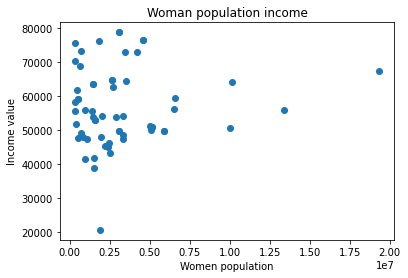

In [31]:
#Making scatter plot of women column
plt.scatter(us_census["Women"], us_census["Income"])
plt.title("Woman population income")
plt.xlabel("Women population")
plt.ylabel("Income value")
plt.show()

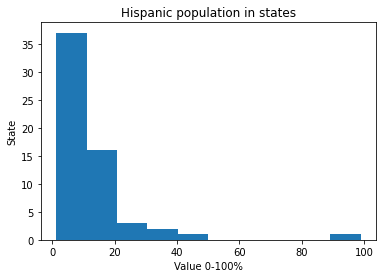

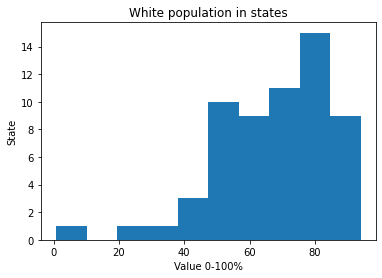

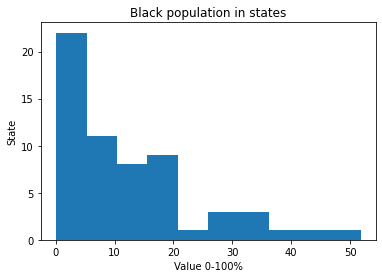

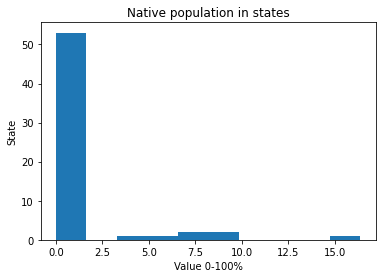

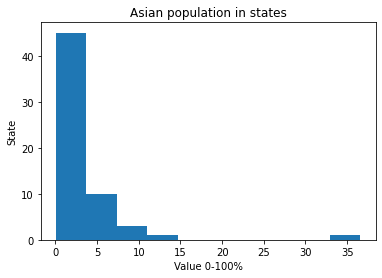

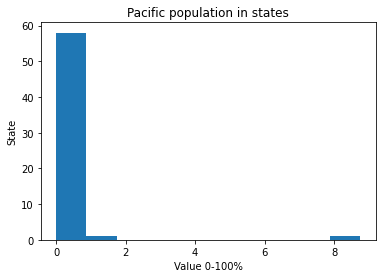

In [32]:
#Histograms of different population in states
ax = plt.subplot()
for column in columns_to_clear:
  plt.hist(us_census[column])
  plt.title('%s population in states' %(column))
  plt.xlabel("Value 0-100%")
  plt.ylabel('State')
  plt.show()

us_census['Unnamed: 0'] = range(len(us_census))
us_census = us_census.set_index('Unnamed: 0')
us_census.to_csv('Us_census.csv')

In [2]:
pd.read_csv('/content/state0.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


In [3]:
pd.read_csv('/content/state1.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
4,4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F
5,5,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F


In [4]:
pd.read_csv('/content/state2.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F
1,1,Hawaii,1406299,9.186708860759486%,25.032278481012657%,2.052848101265823%,0.1449367088607596%,36.59208860759495%,8.758860759493672%,$73264.42628205128,709871M_696428F
2,2,Idaho,1616547,11.505369127516781%,83.1362416107383%,0.5667785234899323%,1.468120805369128%,1.135906040268457%,0.1271812080536914%,$48017.31543624161,810464M_806083F
3,3,Illinois,12873761,15.601733547351516%,60.85980738362764%,17.108410914927717%,0.11842696629213499%,4.475377207062604%,0.02003210272873195%,$59587.04887459807,6316899M_6556862F
4,4,Indiana,6568645,6.536744186046501%,78.43189368770771%,11.18697674418606%,0.1940863787375415%,1.5782724252491687%,0.03262458471760798%,$48616.22784810127,3235263M_3333382F
5,5,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,$53017.75304136253,1534595M_1558931F


In [5]:
pd.read_csv('/content/state3.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,$53017.75304136253,1534595M_1558931F
1,1,Kansas,2892987,11.644342105263148%,75.95828947368425%,6.5678947368421%,0.7339473684210529%,2.331052631578946%,NaN,$53885.612648221344,1439862M_1453125F
2,2,Kentucky,4397353,3.222993688007212%,85.2307484220019%,8.272317403065832%,0.1666366095581602%,1.1298467087466182%,0.046438232642019836%,$45285.80253623189,2164208M_2233145F
3,3,Louisiana,4625253,4.866489361702128%,54.978546099290796%,36.32624113475175%,0.48430851063829816%,1.669060283687941%,0.039184397163120555%,$44957.99376114082,2261156M_2364097F
4,4,Maine,1329100,1.4319088319088318%,93.70740740740736%,1.1344729344729356%,0.7883190883190888%,0.9658119658119669%,0.01566951566951567%,$49181.97435897436,650081M_679019F
5,5,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F


In [6]:
pd.read_csv('/content/state4.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F
1,1,Massachusetts,6705586,11.461065573770476%,73.04105191256845%,6.83312841530056%,0.12827868852459007%,5.835655737704914%,0.0198087431693989%,$72838.93672627235,3249650M_3455936F
2,2,Michigan,9900571,4.634992732558134%,72.38172238372084%,17.633103197674423%,0.48441133720930313%,2.4231104651162796%,0.01954941860465116%,$51201.83003663004,4861973M_5038598F
3,3,Minnesota,5419171,5.152923538230896%,81.42706146926535%,5.65982008995502%,1.069040479760119%,4.156071964017996%,0.032908545727136446%,$62820.833959429,2692166M_2727005F
4,4,Mississippi,2988081,2.842401215805473%,53.28632218844981%,41.491945288753804%,0.3899696048632216%,0.8764437689969605%,0.015045592705167175%,$38909.91920731707,1451723M_1536358F
5,5,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,$49763.98772563177,2964003M_3081445F


In [7]:
pd.read_csv('/content/state5.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,$49763.98772563177,2964003M_3081445F
1,1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,$47645.682835820895,510163M_F
2,2,Nebraska,1869365,9.203759398496235%,81.13947368421056%,4.956203007518794%,0.8644736842105263%,1.8590225563909788%,0.05714285714285715%,$55916.469696969696,929606M_939759F
3,3,Nevada,2798636,27.100883652430046%,53.23932253313698%,7.739617083946994%,1.0871870397643593%,7.095729013254786%,0.5745213549337267%,$55526.525073746314,1407735M_1390901F
4,4,New Hampshire,1324201,3.3219178082191796%,91.31917808219184%,1.2277397260273974%,0.14280821917808229%,2.191438356164382%,0.016095890410958904%,$68728.8595890411,653484M_670717F
5,5,New Jersey,8904413,18.74950049950049%,56.488761238761285%,14.387862137862117%,0.11533466533466513%,8.159990009990018%,0.031318681318681325%,$76581.08341708542,4343027M_4561386F


In [8]:
pd.read_csv('/content/state6.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,New Jersey,8904413,18.74950049950049%,56.488761238761285%,14.387862137862117%,0.11533466533466513%,8.159990009990018%,0.031318681318681325%,$76581.08341708542,4343027M_4561386F
1,1,New Mexico,2084117,45.28293172690762%,40.69799196787147%,1.7550200803212852%,9.248594377510045%,1.23433734939759%,0.04277108433734938%,$47329.96787148595,1032414M_1051703F
2,2,New York,19673174,17.241424747786684%,56.4701050030883%,15.668046119003515%,0.32163887173152117%,7.8971587399629355%,0.023450689726168417%,$64290.74911292006,9541801M_10131373F
3,3,North Carolina,9845333,8.464762782128062%,64.5976508521419%,21.3951174573929%,1.0854905573468434%,2.317457392906495%,0.05232611699677568%,$49937.46413697362,4795408M_5049925F
4,4,North Dakota,721640,2.832682926829267%,87.44829268292683%,1.2843902439024397%,5.651219512195119%,0.9619512195121945%,NaN,$58188.112195121954,367963M_353677F
5,5,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,$49655.24846625767,5662893M_5913084F


In [9]:
pd.read_csv('/content/state7.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,$49655.24846625767,5662893M_5913084F
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,$48100.85426653883,1906944M_1942789F
2,2,Oregon,3939233,11.441212121212132%,78.39551515151517%,1.730787878787877%,1.0002424242424257%,3.594909090909088%,0.3453333333333332%,$54271.90181818182,1948453M_1990780F
3,3,Pennsylvania,12779559,6.128013741411624%,77.38385384134914%,11.633947532791995%,0.11926920674578385%,2.7977514053716495%,0.019394128669581522%,$56170.46451005025,6245344M_6534215F
4,4,Puerto Rico,3583073,98.89357384441935%,0.7736189402480265%,0.0925591882750846%,0.0028184892897406984%,0.07519729425028186%,0.0012401352874859078%,$20720.538285714287,1713860M_1869213F
5,5,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F


In [10]:
pd.read_csv('/content/state8.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,$51805.40540540541,423477M_419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,$55874.522600500095,13171316M_13367298F
5,5,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F


In [11]:
pd.read_csv('/content/state9.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F
5,5,Wisconsin,5742117,6.683333333333334%,79.86400862068966%,8.195186781609202%,0.9536637931034483%,2.404238505747124%,0.020833333333333332%,$53898.889208633096,2851385M_2890732F


In [ ]:
Düzenli İfade Nedir?


Düzenli ifade, bir metinden belirli bir deseni bulmak için kullanılan bir karakter veya sembol grubudur.

Bir düzenli ifade soldan sağa söz konusu harf öbekleriyle eşleşen bir desendir. "Regular expression" söylemesi zor bir tabir olduğundan dolayı, genellikle "regex" ya da "regexp" olarak kısaltılmış olarak bulacaksınız. Düzenli ifade bir harf öbeğinde ki bir metin değiştirmek, form doğrulamak, bir desen eşleşmesine dayalı harf öbeğinden bir alt harf öbeği ayıklamak ve çok daha fazlası için kullanılır.

Bir uygulama yazdığınızı hayal edin ve bir kullanıcı adını seçtiğinde, bu kullanıcı adı için kurallar belirlemek istiyorsunuz. Kullanıcı adının harfler, sayılar, altçizgiler ve tireler içermesine izin vermek, ayrıca, kullanıcı adındaki karakter sayısını sınırlamak istiyorsunuz, böylece çirkin görünmeyecek. Böyle durumlarda kullanıcı adını doğrulamak için aşağıdaki düzenli ifadeyi kullanıyoruz:




Regular expression

Yukardaki düzenli ifade john_doe, jo-hn_doe ve john12_as gibi girişleri kabul edebilir. Jo girişi uyuşmaz, çünkü harf öbeği büyük harf içeriyor ve aynı zamanda uzunluğu 3 karakterden az.

İçindekiler
Temel Eşleştiriciler
Meta Karakterler
Nokta
Karakter Takımı
Negatiflenmiş Karakter Seti
Tekrarlar
Yıldız İşareti
Artı İşareti
Soru İşareti
Süslü Parantez
Karakter Grubu
Karakter Grubu Olmayanlar
Değişim
Özel Karakter Hariç Tutma
Sabitleyiciler
Şapka İşareti
Dolar İşareti
Kısaltma Karakter Takımları
Bakınmak
Olumlu Bakınma
Olumsuz Bakınma
Positive Lookbehind
Negative Lookbehind
İşaretler
Büyük/Küçük Harf Duyarlılığı
Bütünsel Arama
Çok Satırlı
Açgözlü vs Tembel Eşleştirme
1. Temel Eşleştiriciler
Bir düzenli ifade bir metin içinde arama yapabilmek için kullandığımız bir karakter desenidir. Örneğin, the düzenli ifadesi şu anlama gelir: t harfi ardından h, ardından e harfi gelir.

"the" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

123 düzenli ifadesi 123 harf öbeğiyle eşleşir. Düzenli ifade birbiri ardına, girilen harf öbeğindeki her karakter düzenli ifadenin içindeki her karakterle karşılaştırılarak eşleştirilir. Düzenli ifadeler normal olarak büyük/küçük harfe duyarlıdırlar, yani The düzenli ifadesi the harf öbeğiyle eşleşmez.

"The" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

2. Meta Karakterler
Meta karakterler düzenli ifadelerin yapı taşlarıdırlar. Meta karakterler kendileri için değil bunun yerine bazı özel yollarla yorumlanırlar. Bazı meta karakterler özel anlamları vardır ve bunlar köşeli parantez içinde yazılırlar.

Meta karakterler aşağıdaki gibidir:

Meta karakter	Açıklama
.	Satır başlangıcı hariç herhangi bir karakterle eşleşir.
[ ]	Köşeli parantezler arasında bulunan herhangi bir karakterle eşleşir.
[^ ]	Köşeli parantez içerisinde yer alan ^ işaretinden sonra girilen karakterler haricindeki karakterlerle eşleşir.
*	Kendisinden önce yazılan karakterin sıfır veya daha fazla tekrarı ile eşleşir.
+	Kendisinden önce yazılan karakterin bir veya daha fazla olan tekrarı ile eşleşir.
?	Kendisinden önce yazılan karakterin varlık durumunu opsiyonel kılar.
{n,m}	Kendisinden önce yazılan karakterin en az n en fazla m değeri kadar olmasını ifade eder.
(xyz)	Verilen sırayla xyz karakterleriyle eşleşir.
|	Karakterden önce veya sonra verilen ifadelerin herhangi biriyle eşleşebilir. İfadeye Yada anlamı katar.
\	[ ] ( ) { } . * + ? ^ $ \ | özel karakterin aranmasını sağlar.
^	Girilen verinin başlangıcını ifade eder.
$	Girilen verinin sonunu ifade eder.
2.1 Nokta
Nokta . meta karakterlerin en basit örneğidir. . meta karakteri satır başlangıcı hariç herhangi bir karakterle eşleşir. Örneğin, .ar düzenli ifadesinin anlamı: herhangi bir karakterin ardından a harfi ve r harfi gelir.

".ar" => The car parked in the garage.
Düzenli ifadeyi test edin

2.2 Karakter Takımı
Karakter takımları ayrıca Karakter sınıfı olarak bilinir. Karakter takımlarını belirtmek için köşeli ayraçlar kullanılır. Karakterin aralığını belirtmek için bir karakter takımında tire kullanın. Köşeli parantezlerdeki karakter aralığının sıralaması önemli değildir.

Örneğin, [Tt]he düzenli ifadesinin anlamı: bir büyük T veya küçük t harflerinin ardından sırasıyla h ve e harfi gelir.

"[Tt]he" => The car parked in the garage.
Düzenli ifadeyi test edin

Bununla birlikte, bir karakter takımı içerisindeki bir periyot bir tam periyot demektir.

ar[.] düzenli ifadesinin anlamı: Küçük a karakteri ardından r harfi gelir, ardından bir . karakteri gelir.

"ar[.]" => A garage is a good place to park a car.
Düzenli ifadeyi test edin

2.2.1 Negatiflenmiş karakter seti
Genellikle, şapka ^ sembolü harf öbeğinin başlangıcını temsil eder, ama köşeli parantez içinde kullanıldığında verilen karakter takımını hariç tutar.

Örneğin, [^c]ar ifadesinin anlamı: c harfinden hariç herhangi bir harfin ardından a, ardından r gelir.

"[^c]ar" => The car parked in the garage.
Düzenli ifadeyi test edin

2.3 Tekrarlar
+, * ya da ? meta karakterlerinden sonra bir alt desenin kaç defa tekrar edebileceğini belirtmek için kullanılır. Bu meta karakterler farklı durumlarda farklı davranırlar.

2.3.1 Yıldız İşareti
* sembolü, kendinden önce girilen eşlemenin sıfır veya daha fazla tekrarıyla eşleşir. Ama bir karakter seti ya da sınıf sonrasına girildiğinde, tüm karakter setinin tekrarlarını bulur.

a* düzenli ifadesinin anlamı: a karakterinin sıfır veya daha fazla tekrarları, [a-z]* düzenli ifadesinin anlamı ise bir satırdaki herhangi bir sayıdaki küçük harfler anlamına gelir.

"[a-z]*" => The car parked in the garage #21.
Düzenli ifadeyi test edin

* sembolü . meta karakteri ile .* karakterinin herhangi harf öbeğine eşleştirmek için kullanılabilir. * sembolü boşluk karakteriyle \s bir harf öbeğinde boşluk karakterlerini eşleştirmek için kullanılabilir.

Örneğin, \s*cat\s* düzenli ifadesinin anlamı: sıfır veya daha fazla boşluk ardından küçük c karakteri gelir, ardından küçük a karakteri gelir, ardından küçük t karakteri gelir, ardından sıfır veya daha fazla boşluk gelir.

"\s*cat\s*" => The fat cat sat on the concatenation.
Düzenli ifadeyi test edin

2.3.2 Artı İşareti
+ sembolü, kendinden önce girilen eşlemenin bir veya daha fazla tekrarıyla eşleşir.

Örneğin, c.+t ifadesinin anlamı: küçük c harfi, ardından en az bir karakter gelir, ardından küçük t karakteri gelir. Örnekte açıklamak gereken önemli nokta: t harfi cümledeki son t harfi olacaktır. c ve t harfi arasında en az bir karakter vardır.

"c.+t" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

2.3.3 Soru İşareti
Düzenli ifadelerde ? meta karakterinden önce girilen karakteri opsiyonel olarak tanımlar. Bu sembol önce gelen karakterin sıfır veya bir örbeğiyle eşleşir.

Örneğin, [T]?he ifadesinin anlamı: opsiyonel büyük T harfi, ardından küçük h karakteri gelir, ardından küçük e karakteri gelir.

"[T]he" => The car is parked in the garage.
Düzenli ifadeyi test edin

"[T]?he" => The car is parked in the garage.
Düzenli ifadeyi test edin

2.4 Süslü Parantez
Düzenli ifadelerde miktar belirliyiciler olarakda bilinen süslü parantezler, bir karakterin veya karakter grubunun kaç defa tekrar edebileceğini belirtmek için kullanılırlar.

Örneğin, [0-9]{2,3} ifadesinin anlamı: 0 ile 9 aralığındaki karakterlerden, en az 2 en fazla 3 defa ile eşleş.

"[0-9]{2,3}" => The number was 9.9997 but we rounded it off to 10.0.
Düzenli ifadeyi test edin

İkinci numarayı boş bırakabiliriz.

Örneğin, [0-9]{2,} ifadesinin anlamı: En az 2 veya daha fazla defa eşleş. Düzenli ifadeden virgülü kaldırırsak [0-9]{3}: doğrudan 3 defa eşleşir.

"[0-9]{2,}" => The number was 9.9997 but we rounded it off to 10.0.
Düzenli ifadeyi test edin

"[0-9]{3}" => The number was 9.9997 but we rounded it off to 10.0.
Düzenli ifadeyi test edin

2.5 Karakter Grubu
Karakter grubu parantezler içine yazılmış alt desenler grubudur. Daha önce tasarım deseninde değindiğimiz gibi, bir karakterden önce bir miktar belirleyici koyarsak önceki karakteri tekrar eder. Fakat miktar belirleyiciyi bir karakter grubundan sonra koyarsak tüm karakter grubunu tekrarlar.

Örneğin: (ab)* düzenli ifadesi "ab" karakterinin sıfır veya daha fazla tekrarıyla eşleşir.

Ayrıca karakter grubu içinde | meta karakterini kullanabiliriz.

Örneğin, (c|g|p)ar düzenli ifadesinin anlamı: küçük c, g veya p karakteri, ardından a karakteri, ardından r karakteri gelir.

"(c|g|p)ar" => The car is parked in the garage.
Düzenli ifadeyi test edin

Not olarak yakalanan gruplar yalnızca eşleşmez, ayrıca yakalanan karakterler ana dil içinde kullanılır.Bu ana dil Python,JavaScript ve neredeyse herhangi bir dilde düzenli ifadelerin fonksiyon tanımlamalarında olabilir.

2.5.1 Karakter Grubu Olmayanlar
Karakter grubu olmayan bir grup, karakterlerle eşleşen ancak grubu yakalayamayan bir yakalama grubudur. Karakter grubu olmayan bir grup parantez içinde(...) önce ? ve ardından : ile gösterilir. Örneğin, (?:c|g|p)ar düzenli ifadesi, aynı karakterlerle eşleştiği ancak bir yakalama grubu oluşturmayacağı için (c|g|p)ar ifadesine benzer.

"(?:c|g|p)ar" => The car is parked in the garage.
Düzenli ifadeyi test edin

Karakter grubu olmayanlar bul-ve-değiştir işlevselliğinde kullanıldığında veya karakter gruplarıyla karıştırıldığında, herhangi bir başka tür çıktı üretirken genel görünümü korumak için kullanışlı olabilir. Ayrıca bakınız 4. Bakınmak.

2.6 Değişim
Düzenli ifadede dik çizgi alternasyon(değişim, dönüşüm) tanımlamak için kullanılır. Alternasyon birden fazla ifade arasındaki bir koşul gibidir. Şu an, karakter grubu ve alternasyonun aynı şekilde çalıştığını düşünüyor olabilirsiniz. Ama, Karakter grubu ve alternasyon arasındaki büyük fark karakter grubu karakter düzeyinde çalışır ama alternasyon ifade düzeyinde çalışır.

Örneğin, (T|t)he|car düzenli ifadesinin anlamı: Büyük T ya da küçük t karakteri, ardından küçük h karakteri, ardından küçük e ya da c karakteri, ardından küçük a, ardından küçük r karakteri gelir.

"(T|t)he|car" => The car is parked in the garage.
Düzenli ifadeyi test edin

2.7 Özel Karakter Hariç Tutma
\ işareti sonraki karakteri hariç tutmak için kullanılır. Bu bir semboülü ayrılmış karakterlerde { } [ ] / \ + * . $ ^ | ? dahil olmak üzere eşleşen bir karakter olarak belirtmemizi sağlar. Bir özel karakteri eşleşen bir karakter olarak kullanmak için önüne \ işareti getirin.

Örneğin, . düzenli ifadesi yeni satır hariç herhangi bir karakteri eşleştirmek için kullanılır. Bir harf öbeği içinde nokta . karakterini yakalamak için . ayrılmış karakterini hariç tutmamız gerekir. Bunun için nokta önüne \ işaretini koymamız gereklidir.

(f|c|m)at\.? düzenli ifadesinin anlamı: küçük f, cya da m harfi, ardından küçük a harfi, ardından küçük t harfi, ardından opsiyonel . karakteri gelir.

"(f|c|m)at\.?" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

2.8 Sabitleyiciler
Düzenli ifadelerde, eşleşen sembolün girilen harf öbeğinin başlangıç sembolü veya bitiş sembolü olup olmadığını kontrol etmek için sabitleyicileri kullanırız. Sabitleyiciler iki çeşittir: İlk çeşit, eşleşen karakterin girişin ilk karakteri olup olmadığını kontrol eden şapka ^ karakteri, ikinci çeşit ise eşleşen karakterin girişin son karakteri olup olmadığını kontrol eden dolar $ karakteridir.

2.8.1 Şapka İşareti
Şapka ^ işareti eşleşen karakterin giriş harf öbeğinin ilk karakteri olup olmadığını kontrol etmek için kullanılır. Eğer ^a düzenli ifadesini abc harf öbeğine uygularsak a ile eşleşir. Ama ^b ifadesini uygularsak bir eşleşme bulamayız. Bunun nedeni abc harf öbeğinde b karakterinin başlangıç karakteri olmamasıdır.

Bir başka örnek üzerinden ilerlersek,

^(T|t)he düzenli ifadesinin anlamı: büyük T ya da t karakteri giriş harf öbeğinin ilk karakteri olmak üzere, ardından küçük h, ardından küçük e karakteri gelir.

"(T|t)he" => The car is parked in the garage.
Düzenli ifadeyi test edin

"^(T|t)he" => The car is parked in the garage.
Düzenli ifadeyi test edin

2.8.2 Dolar İşareti
Dolar $ işareti eşleşen karakterin giriş harf öbeğinin son karakteri olup olmadığını kontrol etmek için kullanılır.

Örneğin, (at\.)$ ifadesinin anlamı: küçük bir a karakteri, ardından küçük bir t karakteri, ardıdan nokta . karakteri gelir ve bu eşleşme harf öbeğinin sonunda olmalıdır.

"(at\.)" => The fat cat. sat. on the mat.
Düzenli ifadeyi test edin

"(at\.)$" => The fat cat. sat. on the mat.
Düzenli ifadeyi test edin

3. Kısaltma Karakter Takımları
Regex, sık olarak kullanılan düzenli ifadeler için özel karakter setleri ve kısaltmalar sağlar.

Kullanılan karakter setlerinin kısaltmaları aşağıdaki gibidir:

Kısaltma	Açıklama
.	Satır başı hariç herhangi bir karakter
\w	Alfanumerik karakterlerle eşleşir: [a-zA-Z0-9_]
\W	Alfanumerik olmayan karakterlerle eşleşir: [^\w]
\d	Rakamlarla eşlelir: [0-9]
\D	Rakam olmayan karakterlerle eşleşir: [^\d]
\s	Boşluk karakteri ile eşleşir: [\t\n\f\r\p{Z}]
\S	Boşluk karakteri olmayan karakterlerle eşleşir: [^\s]
4. Bakınmak
Bakınma sembolleri, bir ifade öncesinde veya sonrasında başka bir ifademiz olduğunda kullanılırlar.

Örneğin, $4.44 ve $10.88 girişlerinden $ karakteri önündeki tüm sayıları almak istiyoruz, bu durumda (?<=\$)[0-9\.]* ifadesini kullanırız.

(?<=\$)[0-9\.]* ifadesinin anlamı: . karakterini içeren ve $ karakteriyle devam eden tüm sayıları al demektir.

Düzenli ifadelerde kullanılan bakınma sembolleri aşadaki gibidir:

Sembol	Açıklama
?=	Positive Lookahead (Verdiğimiz ifade sonrası arar ve eşleşme varsa sonuç döndürür.)
?!	Negative Lookahead (Verdiğimiz ifade sonrası arar ve eşleşme yoksa sonuç döndürür.)
?<=	Positive Lookbehind (Verdiğimiz ifade öncesini arar ve eşleşme varsa sonuç döndürür.)
?<-!-	Negative Lookbehind (Verdiğimiz ifade öncesini arar ve eşleşme yoksa sonuç döndürür.)
4.1 Positive Lookahead
Positive Lookahead, ifadenin ilk bölümü bakınma ifadesiyle devam etmesi gerektiğini savunur. Bulunan eşleşme yalnızca ifadenin ilk bölümüyle eşleşen metin içerir. Olumlu bir bakınma tanımlamak için, içinde eşittir işareti yer alan parantezler (?=...) şeklinde kullanılır. Bakınma ifadesi parantezler içinde eşittir işaretinden sonra yazılır.

Örneğin, [T|t]he(?=\sfat) ifadesinin anlamı: opsiyonel küçük bir t ya da büyük T harfi, ardından h harfi gelir, ardından e harfi gelir. Parantez içinde ise bu dizilimin bir boşluk karakterinden sonra fat öbeğiyle devam edeceğini tanımlıyoruz.

"[T|t]he(?=\sfat)" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

4.2 Negative Lookahead
Negative Lookahead sembolü positive lookahead tersine, verdiğimiz desenle devam etmemesi durumunda eşleşir. Bu sembol positive lookahead gibi tanımlanır ama = işareti yerine ! kullanılır.

[T|t]he(?!\sfat) ifadesinin anlamı: opsiyonel küçük bir t ya da büyük T harfi, ardından h harfi gelir, ardından e harfi gelir, ardından öncesinde boşluk olan bir fat öbeği olmamalıdır.

"[T|t]he(?!\sfat)" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

4.3 Positive Lookbehind
Positive Lookbehind, belirli bir desenden önceki eşleşmeleri almak için kullanılır. (?<=...) ile gösterilir.

Örneğin, (?<=[T|t]he\s)(fat|mat) ifadesinin anlamı: Öncesinde The veya the öbekleri olan tüm fat veya mat öbeklerini getir.

"(?<=[T|t]he\s)(fat|mat)" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

4.4 Negative Lookbehind
Negative Lookbehind, belirli bir desenden önce olmayan eşleşmeleri almak için kullanılır. (?<=!..) ile gösterilir.

Örneğin, (?<!(T|t)he\s)(cat) ifadesinin anlamı: Öncesinde The veya the öbekleri yer almayan tüm cat öbeklerini getir.

"(?<![T|t]he\s)(cat)" => The cat sat on cat.
Düzenli ifadeyi test edin

5. İşaretler
İşaretler ayrıca düzenleyiciler olarak bilinirler, çünkü onlar bir düzenli ifadenin çıktısını düzenlerler. Bu işaretler herhangi bir sırada veya kombinasyonda kullanılabilirler, ve bunlar Düzenli İfadelerin ayrılmaz bir parçasıdırlar.

İşaret	Açıklama
i	Büyük küçük harf duyarlılık: Eşleştirmeleri küçük/büyük harfe karşı duyarsız yapar.
g	Genel Arama: Girilen harf öbeği boyunca bir desen arar.
m	Çok satırlı: Sabitleyici meta karakteri her satırda çalışır.
5.1 Büyük/Küçük harf duyarlılığı
i işaretleyicisi büyük/küçük harfe duyarsız eşleştirme yapmak için kullanılır.

Örneğin, /The/gi ifadesi: büyük T harfi, ardından küçük h harfi, ardından küçük e harfi gelir. ifadenin sonunda yer alan i işareti büyük-küçük harfe karşı duyarsız olması gerektiğini belirtir. Ayrıca g işaretinide kullandığımızı görebilirsiniz, tüm text içinde bu aramayı yapmak istediğimiz için g işaretini ayrıca belirtiyoruz.

"The" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

"/The/gi" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

5.2 Genel Arama
g işareti bir giriş içinde eşleşen tüm varsayonları bulmak için kullanılır. g işareti kullanılmazsa ilk eşleşme bulunduktan sonra arama sona erer.

"/.(at)/" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

"/.(at)/g" => The fat cat sat on the mat.
Düzenli ifadeyi test edin

5.3 Çok Satırlı
m işareti çok satırlı bir eşleşme bulmak için kullanılır. Daha önce sabitleyicilerde gördüğümüz gibi (^, $) sembolleri aradığımız desenin harf öbeğinin başında veya sonunda olup olmadığını kontrol etmemiz için kullanılır. Bu sabitleyicilerin tüm satırlarda çalışması için m işaretini kullanırız.

Örneğin, /at(.)?$/gm ifadesinin anlamı: küçük a harfi, ardından küçük t harfi gelir, ardından opsiyonel olarak yeni satır hariç herhangi birşey gelebilir. m işaretini kullandığımız için bir girişin her satırının sonunda eşleştirir.

"/.at(.)?$/" => The fat
                cat sat
                on the mat.
Düzenli ifadeyi test edin

"/.at(.)?$/gm" => The fat
                  cat sat
                  on the mat.
Düzenli ifadeyi test edin

6. Açgözlü vs Tembel Eşleştirme
Varsayılan olarak, bir düzenli ifade açgözlü bir eşleştirme yapacaktır, bu da eşleşmenin mümkün olduğu kadar çok olacağı anlamına gelir. Tembel bir şekilde eşleştirmek için ? kullanabiliriz, bu da eşleşme olabildiğince kısa olacaktır.

"/(.*at)/" => The fat cat sat on the mat. 
Düzenli ifadeyi test edin

"/(.*?at)/" => The fat cat sat on the mat. 
Düzenli ifadeyi test edin

Contribution
Report issues
Open pull request with improvements
Spread the word
Reach out to me directly at ziishaned@gmail.com or 